# Final Project Part 3

## Import Libraries, Set Path and Load Data

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')


loan_path = Path('loan.csv')
loans = pd.read_csv(loan_path)
loans.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing Columns

Drop id and member id as they give no information about the actual loans

In [5]:
loans = loans.drop(['id','member_id'], axis = 'columns')

drop funded_amnt, and funded_amnt_inv as they provide no additional information to loan amount

In [7]:
loans = loans.drop(['funded_amnt','funded_amnt_inv'], axis = 'columns')

Drop Emp_title as NULLS still have employment length

In [ ]:
loans = loans.drop(['emp_title'], axis = 'columns')

In [16]:
loans = loans.drop(['zip_code'], axis = 'columns')

In [22]:
loans = loans.drop(['url','title','purpose'], axis = 'columns')

In [37]:
loans.loc[:,'issued'] = pd.to_datetime(loans.loc[:,'issue_d'])

make employment length dummie variables

In [51]:
loans = pd.concat([loans, pd.get_dummies(loans.loc[:,'home_ownership'])], axis=1)
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,inq_fi,total_cu_tl,inq_last_12m,issued,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,NaN,NaN,NaN,2011-12-01,0,0,0,0,0,1
1,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,NaN,NaN,NaN,2011-12-01,0,0,0,0,0,1
2,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,NaN,NaN,NaN,2011-12-01,0,0,0,0,0,1
3,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,NaN,NaN,NaN,2011-12-01,0,0,0,0,0,1
4,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,NaN,NaN,NaN,2011-12-01,0,0,0,0,0,1


Make Term Dummy Variables (Only 2 options)

In [76]:
loans = pd.concat([loans, pd.get_dummies(loans.loc[:,'term'])], axis=1)
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,inq_last_12m,issued,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,36 months,60 months
0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,NaN,2011-12-01,0,0,0,0,0,1,1,0
1,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,NaN,2011-12-01,0,0,0,0,0,1,0,1
2,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,NaN,2011-12-01,0,0,0,0,0,1,1,0
3,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,NaN,2011-12-01,0,0,0,0,0,1,1,0
4,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,NaN,2011-12-01,0,0,0,0,0,1,0,1


## Selecting the Appropriate Columns For KNN

In [69]:
loans.dropna(subset=['open_acc'], inplace = True)

In [70]:
feature_cols = ['loan_amnt','int_rate','installment'
               ,'annual_inc','open_acc']
X = loans.loc[:,feature_cols]
y = loans.loc[:,'loan_status']


## Make a KNN model with all loan statuses

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Train Test Split to make sure we are not overfitting

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

loop through nearnest neighbor values (not I went to 100 but did it in bunches as it was taking a very long time

In [166]:
train_scores = []

for k in range(50,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = float(sum(pred == y_test)) / len(y_test)
    train_scores.append([k, score])
    
scores_df = pd.DataFrame(train_scores, columns=['k', 'train_score'])

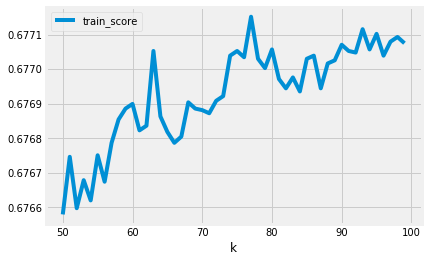

In [167]:
ax = scores_df.plot(kind='line', x='k', y='train_score')

In [157]:
knn_best = KNeighborsClassifier(n_neighbors=1)
knn_best.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [165]:
y_pred_class = knn_best.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.5575780524526907

## Make a Logistic Regression Model for Bad Status Loans

Map all loan status to "Bad Loan" to make a logistic Regression Model

In [81]:
loans.loc[:,'Bad_Status'] = loans.loan_status.isin(['Late (31-120 days)'
                                                               ,'Late (16-30 days)',
                                                               'Charged Off'
                                                               ,'Default'
                                                               ,'Does not meet the credit policy. Status:Charged Off']
                                                             )

In [107]:
feature_cols = ['loan_amnt','int_rate','installment','NONE', 'OTHER', 'OWN','RENT',' 60 months'
               ,'annual_inc','open_acc']
X_lr = loans.loc[:,feature_cols]
y_lr = loans.loc[:,'Bad_Status']

In [159]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, random_state=99, shuffle=True)

logreg.fit(X_lr_train,y_lr_train)
pred = logreg.predict(X_lr_test)

Grab the Score of the logistic regression model

In [114]:
logreg.score(X_lr_test, y_lr_test)

0.9305980039488275

In [160]:
pred.sum()

0

The model was just predicting Good Status (or the null model). Going to run with all data to make sure it's not a sampling error

In [121]:
logreg2 = LogisticRegression()

logreg2.fit(X_lr,y_lr)
pred2 = logreg2.predict(X_lr)

In [122]:
logreg.score(X_lr, y_lr)

0.9310610243984899

In [123]:
pred2.sum()

0

logistic Regression just kept predicting Good Status (Null Model). We can store the probabilites and look at a histogram of them

In [184]:
loans.loc[:, 'loan_bad_prob'] = logreg.predict_proba(X_lr)[:, 1]

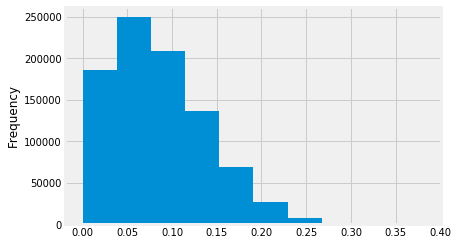

In [185]:
loans.loc[:,'loan_bad_prob'].plot(kind = 'hist')

## Decision Tree Prediction

In [168]:
feature_cols = ['loan_amnt','int_rate','installment','NONE', 'OTHER', 'OWN','RENT',' 60 months'
               ,'annual_inc','open_acc']
X_dt = loans.loc[:,feature_cols]
y_dt = loans.loc[:,'Bad_Status']

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

Loop through all max depth ranges and store the error to select the best model

In [175]:
max_depth_range = list(range(1, 12))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_dt, y_dt, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

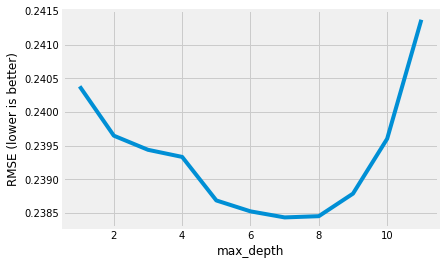

In [136]:
fig, ax = plt.subplots()
ax.plot(max_depth_range, RMSE_scores);
ax.set_xlabel('max_depth');
ax.set_ylabel('RMSE (lower is better)');

In [140]:
treereg_best = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg_best.fit(X_dt,y_dt)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Grab the feature importance of the best model

pd.DataFrame({'feature':feature_cols, 'importance':treereg_best.feature_importances_}).sort_values(
    by = 'importance', ascending = False)

Export the graphic of the Decision Tree

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(treereg_best, out_file= 'tree_loans.dot', feature_names=feature_cols)

Build a decision tree classifier with the correct max depth

In [180]:
treereg2 = DecisionTreeClassifier(max_depth=7, random_state=1)
treereg2.fit(X_dt,y_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [181]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg2.feature_importances_}).sort_values(
    by = 'importance', ascending = False)

,feature,importance
1,int_rate,0.877441
8,annual_inc,0.041783
7,60 months,0.030006
2,installment,0.028336
0,loan_amnt,0.010927
6,RENT,0.007850
9,open_acc,0.003657
3,NONE,0.000000
4,OTHER,0.000000
5,OWN,0.000000


In [182]:
from sklearn.tree import export_graphviz

export_graphviz(treereg2, out_file= 'tree_loans2.dot', feature_names=feature_cols)